# Introduction

#### Context

The Consumer Behavior and Shopping Habits Dataset provides comprehensive insights into consumers' preferences, tendencies, and patterns during their 
shopping experiences. This dataset encompasses a diverse range of variables, including demographic information, purchase history, product preferences,
shopping frequency, and online/offline shopping behavior. With this rich collection of data, analysts and researchers can delve into the intricacies of 
consumer decision-making processes, aiding businesses in crafting targeted marketing strategies, optimizing product offerings, and enhancing overall 
customer satisfaction.

#### Content

The Consumer Behavior and Shopping Habits Dataset provides a detailed overview of consumer preferences and purchasing behaviors. It includes 
demographic information, purchase history, product preferences, and preferred shopping channels (online or offline). This dataset is essential for 
businesses aiming to tailor their strategies to meet customer needs and enhance their shopping experience, ultimately driving sales and loyalty.

#### Problem Statement
How many customer segments can we distinguish from the dataset using customer profiles?

# Imports

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle 

# Load Data

In [4]:
#Loading data
shopping_trends= pd.read_csv("C:/Users/Casey/Documents/Projects/Shopping Habits/shopping_trends.csv")

In [6]:
shopping_trends.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [8]:
#returns a tuple representing the dimensionality 
shopping_trends.shape

(3900, 19)

In [10]:
#return the total number of missing values in each column 
shopping_trends.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [12]:
#identify columns
shopping_trends.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [14]:
#returns the number of unique elements in each column
shopping_trends.nunique()

Customer ID                 3900
Age                           53
Gender                         2
Item Purchased                25
Category                       4
Purchase Amount (USD)         81
Location                      50
Size                           4
Color                         25
Season                         4
Review Rating                 26
Subscription Status            2
Payment Method                 6
Shipping Type                  6
Discount Applied               2
Promo Code Used                2
Previous Purchases            50
Preferred Payment Method       6
Frequency of Purchases         7
dtype: int64

In [16]:
#Cheking for duplicates 
value=len(shopping_trends[shopping_trends.duplicated()])
print(value) 

0


In [18]:
#provides a concise summary of the central tendency and variability of each column
shopping_trends.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [20]:
#provides a concise summary
shopping_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

#### Distribution Of item purchased By Location

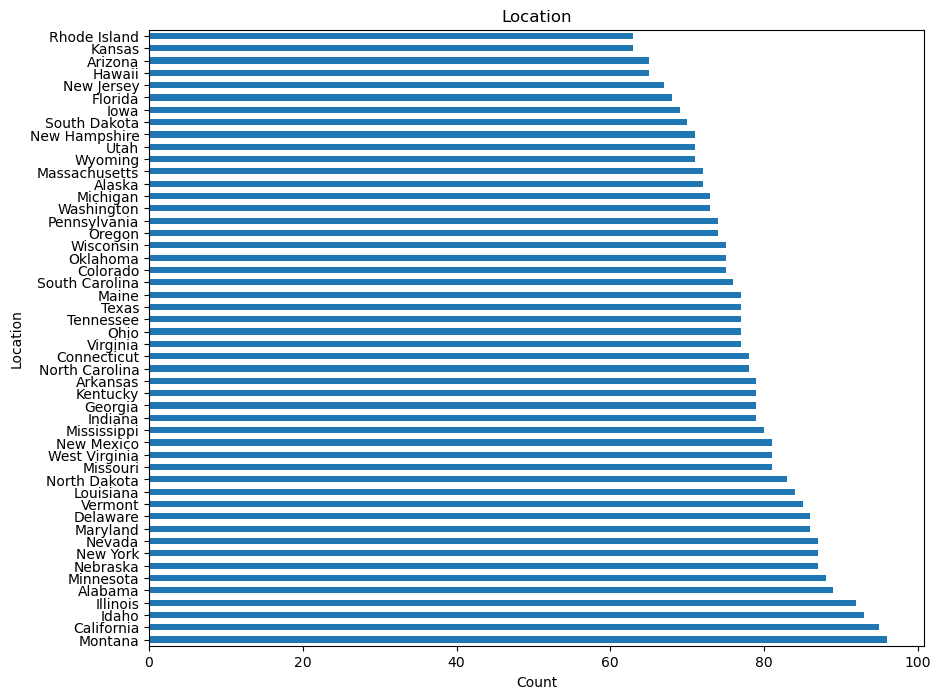

In [23]:
#Create subplots on 1 row and 1 columns with a figsize of (10, 8)
fig, ax = plt.subplots(1, 1, figsize=(10,8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
shopping_trends.Location.value_counts().plot(kind='barh')
#Give the plot a helpful title of 'Location'
ax.set_title('Location')
#Label the xaxis 'Count'
ax.set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);

Montana is the best area to sell due to the highest number of customers.

#### Avarage purchase amount price by location

In [27]:
location_price_means = shopping_trends.groupby('Location')[['Purchase Amount (USD)']].mean()
location_price_means.head()

,Purchase Amount (USD)
Location,
Alabama,59.112360
Alaska,67.597222
Arizona,66.553846
Arkansas,61.113924
California,59.000000


Highest average purchase amount: Alaska has the highest average purchase amount, with an average of $67.60.

Lowest average purchase amount: California has the lowest average purchase amount, with an average of $59.00.

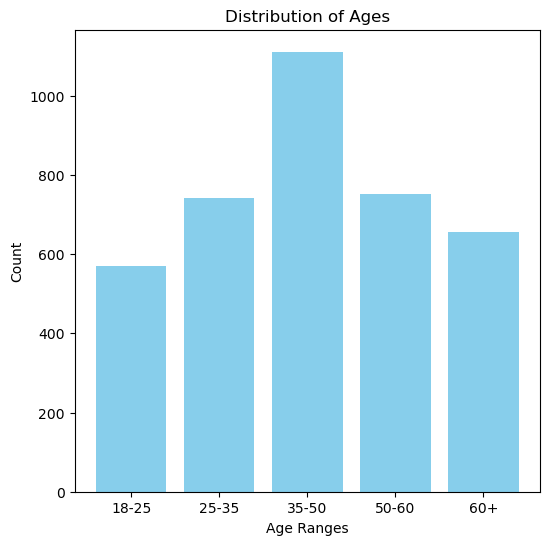

In [35]:
# Count individuals in each age range

# Define age ranges
age_ranges = {
    '18-25': range(18, 26),
    '25-35': range(26, 36),
    '35-50': range(36, 51),
    '50-60': range(51, 61),
    '60+': range(61, 70)
}

age_counts = {age_range: shopping_trends[shopping_trends['Age'].isin(age_ranges[age_range])]['Age'].count() for age_range in age_ranges}

# Plotting
plt.figure(figsize=(6, 6))
plt.bar(age_counts.keys(), age_counts.values(), color='skyblue')
plt.title('Distribution of Ages')
plt.xlabel('Age Ranges')
plt.ylabel('Count')
plt.show()

The higest age range is between 35-50.

In [65]:
##Grouping number of items previously purchased by category
shopping_trends.groupby(['Category'])['Previous Purchases'].agg([np.average, min, max]).sort_values(by =  'average', ascending = False)

C:\Users\Casey\AppData\Local\Temp\ipykernel_19216\1867277746.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  shopping_trends.groupby(['Category'])['Previous Purchases'].agg([np.average, min, max]).sort_values(by =  'average', ascending = False)
C:\Users\Casey\AppData\Local\Temp\ipykernel_19216\1867277746.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  shopping_trends.groupby(['Category'])['Previous Purchases'].agg([np.average, min, max]).sort_values(by =  'average', ascending = False)


,average,min,max
Category,,,
Accessories,25.725806,1,50
Footwear,25.232053,1,50
Clothing,25.199194,1,50
Outerwear,24.956790,1,50


In [67]:
#Grouping purchase amounts by type of item purchased
shopping_trends.groupby(['Item Purchased'])['Purchase Amount (USD)'].agg([np.average, min, max]).sort_values(by= 'average', ascending = False)

C:\Users\Casey\AppData\Local\Temp\ipykernel_19216\3057881542.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  shopping_trends.groupby(['Item Purchased'])['Purchase Amount (USD)'].agg([np.average, min, max]).sort_values(by= 'average', ascending = False)
C:\Users\Casey\AppData\Local\Temp\ipykernel_19216\3057881542.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  shopping_trends.groupby(['Item Purchased'])['Purchase Amount (USD)'].agg([np.average, min, max]).sort_values(by= 'average', ascending = False)


,average,min,max
Item Purchased,,,
T-shirt,62.911565,20,100
Boots,62.625000,21,100
Dress,62.168675,20,100
Shoes,61.600000,20,99
Shirt,61.136095,20,99
Scarf,60.898089,20,99
Blouse,60.877193,20,100
Hat,60.876623,20,98
Jeans,60.870968,20,99


In [77]:
# grouping purchase amounts by all the fields in data

sorted_purchase_amount = shopping_trends.groupby(['Location','Category','Item Purchased','Season','Subscription Status','Discount Applied',
                                                  'Promo Code Used'])['Purchase Amount (USD)'].agg([np.average,min, max]).sort_values(by = 'min',
                                                                                    ascending = False)

C:\Users\Casey\AppData\Local\Temp\ipykernel_19216\953579357.py:4: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  'Promo Code Used'])['Purchase Amount (USD)'].agg([np.average,min, max]).sort_values(by = 'min',
C:\Users\Casey\AppData\Local\Temp\ipykernel_19216\953579357.py:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  'Promo Code Used'])['Purchase Amount (USD)'].agg([np.average,min, max]).sort_values(by = 'min',


In [79]:
sorted_purchase_amount

average  \
Location      Category    Item Purchased Season Subscription Status Discount Applied Promo Code Used            
Delaware      Clothing    Socks          Spring Yes                 Yes              Yes                100.0   
Alabama       Accessories Sunglasses     Winter No                  No               No                 100.0   
Michigan      Clothing    Shorts         Summer No                  Yes              Yes                100.0   
Wisconsin     Footwear    Boots          Winter No                  Yes              Yes                100.0   
West Virginia Clothing    T-shirt        Spring No                  Yes              Yes                100.0   
...                                                                                                       ...   
Utah          Footwear    Sandals        Summer No                  No               No                  20.0   
              Clothing    Socks          Summer Yes                 Yes              Yes                 20.0   
              Accessories Hat            Summer Yes                 Yes              Yes                 20.0   
Maryland      Accessories Scarf          Spring Yes                 Yes              Yes                 20.0   
New York      Clothing    Hoodie         Spring No                  No               No                  20.0   

                                                                                                      min  \
Location      Category    Item Purchased Season Subscription Status Discount Applied Promo Code Used        
Delaware      Clothing    Socks          Spring Yes                 Yes              Yes              100   
Alabama       Accessories Sunglasses     Winter No                  No               No               100   
Michigan      Clothing    Shorts         Summer No                  Yes              Yes              100   
Wisconsin     Footwear    Boots          Winter No                  Yes              Yes              100   
West Virginia Clothing    T-shirt        Spring No                  Yes              Yes              100   
...                                                                                                   ...   
Utah          Footwear    Sandals        Summer No                  No               No                20   
              Clothing    Socks          Summer Yes                 Yes              Yes               20   
              Accessories Hat            Summer Yes                 Yes              Yes               20   
Maryland      Accessories Scarf          Spring Yes                 Yes              Yes               20   
New York      Clothing    Hoodie         Spring No                  No               No                20   

                                                                                                      max  
Location      Category    Item Purchased Season Subscription Status Discount Applied Promo Code Used       
Delaware      Clothing    Socks          Spring Yes                 Yes              Yes              100  
Alabama       Accessories Sunglasses     Winter No                  No               No               100  
Michigan      Clothing    Shorts         Summer No                  Yes              Yes              100  
Wisconsin     Footwear    Boots          Winter No                  Yes              Yes              100  
West Virginia Clothing    T-shirt        Spring No                  Yes              Yes              100  
...                                                                                                   ...  
Utah          Footwear    Sandals        Summer No                  No               No                20  
              Clothing    Socks          Summer Yes                 Yes              Yes               20  
              Accessories Hat            Summer Yes                 Yes              Yes               20  
Maryland      Accessories 

In [85]:
#group items previously purchased by all the fieldsin data
sorted_item_previously_purchased = shopping_trends.groupby(['Location','Category','Item Purchased','Season','Subscription Status',
                                                                        'Discount Applied','Promo Code Used'])['Previous Purchases'].agg([np.average,min, 
                                                                                        max]).sort_values(by = 'min', ascending = False)


C:\Users\Casey\AppData\Local\Temp\ipykernel_19216\2603119221.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  'Discount Applied','Promo Code Used'])['Previous Purchases'].agg([np.average,min,
C:\Users\Casey\AppData\Local\Temp\ipykernel_19216\2603119221.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  'Discount Applied','Promo Code Used'])['Previous Purchases'].agg([np.average,min,


In [87]:
sorted_item_previously_purchased[700:900]

,,,,,,,average,min,max
Location,Category,Item Purchased,Season,Subscription Status,Discount Applied,Promo Code Used,,,
Missouri,Accessories,Sunglasses,Fall,No,No,No,38.0,38,38
Arkansas,Clothing,Dress,Spring,No,Yes,Yes,39.0,38,40
Wisconsin,Accessories,Scarf,Fall,No,No,No,38.0,38,38
Alaska,Clothing,Blouse,Winter,No,No,No,38.0,38,38
Massachusetts,Outerwear,Coat,Fall,No,No,No,38.0,38,38
...,...,...,...,...,...,...,...,...,...
New Hampshire,Clothing,Pants,Fall,No,No,No,35.0,35,35
Arizona,Footwear,Sneakers,Fall,Yes,Yes,Yes,35.0,35,35
New York,Accessories,Hat,Winter,No,No,No,35.0,35,35


In [97]:
# save the data
with open('shopping_trends.pkl', 'wb') as f:
    pickle.dump(shopping_trends, f)
